# Correlation and utility analysis of different data in predicting stock market value

This notebook's purpose is to determine how we can use different data provided by yfinance to predict the next stock market rates.

In [83]:
# 1) Install yfinance if not already installed
import sys
import pandas as pd
from IPython.display import display, Image, HTML

try:
    import yfinance as yf
except ImportError:
    %pip install yfinance --quiet
    import yfinance as yf

print("yfinance version:", getattr(yf, "__version__", "unknown"))

yfinance version: 0.2.66


In [84]:
US_names = [
    # USA
    "AAPL",
    "MSFT",
    "NVDA",
    "AMZN",
    "GOOGL",
    "GOOG",
    "META",
    "AVGO",
    "LLY",
    "TSLA",
    "JPM",
    "V",
    "XOM",
    "UNH",
    "JNJ",
    "WMT",
    "MA",
    "PG",
    "ORCL",
    "COST",
    "MRK",
    "HD",
    "KO",
    "PEP",
    "BAC",
    "ADBE",
    "CRM",
    "NFLX",
    "CSCO",
    "AMD",
]

CN_names = [
    # China
    "600519.SS",
    "601318.SS",
    "601398.SS",
    "601288.SS",
    "601988.SS",
    "601857.SS",
    "600028.SS",
    "600036.SS",
    "601166.SS",
    "600900.SS",
    "601888.SS",
    "601012.SS",
    "600104.SS",
    "600030.SS",
    "600585.SS",
    "600000.SS",
    "601601.SS",
    "601939.SS",
    "600019.SS",
    "600276.SS",
    "601766.SS",
    "600309.SS",
    "601633.SS",
    "600887.SS",
    "601668.SS",
    "601658.SS",
    "601728.SS",
    "601628.SS",
    "688981.SS",
]

EU_names = [
    # Europe
    "MC.PA",
    "ASML.AS",
    "OR.PA",
    "TTE.PA",
    "SAN.PA",
    "RMS.PA",
    "AIR.PA",
    "BNP.PA",
    "SU.PA",
    "KER.PA",
]

JP_names = [
    # Japan
    "7203.T",
    "6758.T",
    "9984.T",
    "6861.T",
    "8035.T",
    "9983.T",
    "9432.T",
    "6098.T",
    "4502.T",
    "8316.T",
]

SA_names = [
    # Saudi Arabia
    "2222.SR",
    "1120.SR",
    "2010.SR",
    "1180.SR",
    "1211.SR",
    "7010.SR",
    "2280.SR",
    "1050.SR",
    "1060.SR",
    "4013.SR",
]

CRYPTO_names = [
    # Cryptocurrency
    "BTC-USD",
    "ETH-USD",
    "USDT-USD",
    "BNB-USD",
    "SOL-USD",
    "XRP-USD",
    "USDC-USD",
    "DOGE-USD",
    "ADA-USD",
    "TRX-USD",
    "TON-USD",
    "AVAX-USD",
    "SHIB-USD",
    "DOT-USD",
    "DAI-USD",
    "LTC-USD",
    "WBTC-USD",
    "BCH-USD",
    "LINK-USD",
    "NEAR-USD",
]

FX_names = [
    # Forex
    "EURUSD=X",
    "USDJPY=X",
    "GBPUSD=X",
    "USDCNY=X",
    "USDCHF=X",
    "AUDUSD=X",
    "USDCAD=X",
    "NZDUSD=X",
    "EURJPY=X",
    "GBPJPY=X",
]

COM_names = [
    # Commodities & Energy
    "GC=F",
    "SI=F",
    "PL=F",
    "CL=F",
    "BZ=F",
    "NG=F",
    "ZC=F",
    "ZW=F",
    "ZS=F",
    "KC=F",
]

IDX_names = [
    # Indices
    "^GSPC",
    "^DJI",
    "^IXIC",
    "^RUT",
    "^GSPTSE",
    "^FTSE",
    "^GDAXI",
    "^FCHI",
    "^STOXX50E",
    "FTSEMIB.MI",
    "SMIN.SW",
    "^IBEX",
    "^AEX",
    "^BFX",
    "^OMX",
    "^N100",
    "^N225",
    "TOPIX100.T",
    "^HSI",
    "000001.SS",
    "399001.SZ",
    "^KS11",
    "^TWII",
    "^STI",
    "^BSESN",
    "^AXJO",
    "^NZ50",
    "^JKSE",
    "^KLSE",
    "^BVSP",
]


In [85]:
ticker_groups = {
    "USA": US_names,
    "China": CN_names,
    "EU": EU_names,
    "JP": JP_names,
    "SA": SA_names,
    "CRYPTO": CRYPTO_names,
    "FX": FX_names,
    "COM": COM_names,
    "IDX": IDX_names,
}

data = {}
ticker_markets = {}

for market, names in ticker_groups.items():
    for name in names:
        ticker = yf.Ticker(name)
        info = None
        if hasattr(ticker, "get_info"):
            try:
                info = ticker.get_info()
            except Exception as e:
                print("get_info() failed for ", ticker.ticker, ":", e)
                try:
                    info = ticker.info
                except Exception as e2:
                    print(".info failed for ", ticker.ticker, ":", e2)
        else:
            try:
                info = ticker.info
            except Exception as e3:
                print(".info failed for ", ticker.ticker, ":", e3)
        if info is None:
            print(f"No info retrieved for {ticker.ticker}; skipping.")
            continue
        data[ticker.ticker] = info
        ticker_markets[ticker.ticker] = market


In [86]:
features = [
    "allTimeHigh",
    "allTimeLow",
    "auditRisk",
    "averageAnalystRating",
    "ask",
    "beta",
    "bid",
    "boardRisk",
    "bookValue",
    "currentPrice",
    "dayHigh",
    "dayLow",
    "debtToEquity",
    "displayName",
    "dividendDate",
    "dividendRate",
    "earningsGrowth",
    "earningsQuarterlyGrowth",
    "ebitda",
    "ebitdaMargins",
    "enterpriseToEbitda",
    "enterpriseToRevenue",
    "enterpriseValue",
    "epsCurrentYear",
    "epsForward",
    "epsTrailingTwelveMonths",
    "exDividendDate",
    "fiftyDayAverage",
    "fiftyDayAverageChange",
    "fiftyDayAverageChangePercent",
    "fiftyTwoWeekChangePercent",
    "fiftyTwoWeekHigh",
    "fiftyTwoWeekHighChange",
    "fiftyTwoWeekHighChangePercent",
    "fiftyTwoWeekLow",
    "fiftyTwoWeekLowChange",
    "fiftyTwoWeekLowChangePercent",
    "floatShares",
    "forwardEps",
    "freeCashflow",
    "grossMargins",
    "grossProfits",
    "hasPrePostMarketData",
    "impliedSharesOutstanding",
    "industry",
    "industryDisp",
    "irWebsite",
    "longBusinessSummary",
    "longName",
    "marketCap",
    "netIncomeToCommon",
    "open",
    "operatingCashflow",
    "operatingMargins",
    "overallRisk",
    "postMarketChange",
    "postMarketChangePercent",
    "postMarketPrice",
    "postMarketTime",
    "previousClose",
    "priceEpsCurrentYear",
    "priceToBook",
    "profitMargins",
    "quickRatio",
    "recommendationKey",
    "recommendationMean",
    "regularMarketChange",
    "regularMarketChangePercent",
    "regularMarketDayHigh",
    "regularMarketDayLow",
    "regularMarketOpen",
    "regularMarketPreviousClose",
    "regularMarketPrice",
    "regularMarketTime",
    "returnOnAssets",
    "returnOnEquity",
    "revenueGrowth",
    "revenuePerShare",
    "sector",
    "sectorDisp",
    "shareHolderRightsRisk",
    "sharesPercentSharesOut",
    "sharesShort",
    "shortName",
    "symbol",
    "targetHighPrice",
    "targetLowPrice",
    "targetMeanPrice",
    "targetMedianPrice",
    "totalCash",
    "totalCashPerShare",
    "totalDebt",
    "totalRevenue",
    "trailingEps",
    "trailingPE",
    "trailingPegRatio",
    "twoHundredDayAverage",
    "twoHundredDayAverageChange",
    "twoHundredDayAverageChangePercent",
    "volume",
    "website",
]

def compute_fill_rate_series(frame):
    return (
        frame.notna()
        .mean()
        .mul(100)
        .round(2)
    )

if not data:
    print("No ticker info retrieved; cannot compute feature fill rates.")
else:
    info_df = pd.DataFrame.from_dict(data, orient="index")
    feature_df = info_df.reindex(columns=features)

    group_fill_rates = {}
    group_sizes = {}
    markets = ["USA", "China", "EU", "JP", "SA", "CRYPTO", "FX", "COM", "IDX"]

    for market in markets:
        market_tickers = [ticker for ticker, origin in ticker_markets.items() if origin == market]
        subset = feature_df.loc[[ticker for ticker in market_tickers if ticker in feature_df.index]]
        if subset.empty:
            print(f"No data available for {market}; skipping fill-rate computation.")
            continue
        group_fill_rates[market] = compute_fill_rate_series(subset)
        group_sizes[market] = len(subset)

    if feature_df.empty:
        print("No data available for combined dataset; skipping fill-rate computation.")
    else:
        group_fill_rates["Combined"] = compute_fill_rate_series(feature_df)
        group_sizes["Combined"] = len(feature_df)

    if not group_fill_rates:
        print("No fill-rate results to display.")
    else:
        combined_df = (
            pd.DataFrame(group_fill_rates)
            .reindex(features)
            .rename_axis("feature")
            .reset_index()
        )

        rename_map = {
        "USA": "fill_rate_pct_USA",
        "China": "fill_rate_pct_China",
        "EU": "fill_rate_pct_EU",
        "JP": "fill_rate_pct_JP",
        "SA": "fill_rate_pct_SA",
        "CRYPTO": "fill_rate_pct_CRYPTO",
        "FX": "fill_rate_pct_FX",
        "COM": "fill_rate_pct_COM",
        "IDX": "fill_rate_pct_IDX",
        "Combined": "fill_rate_pct_Total",
        }
        combined_df = combined_df.rename(columns=rename_map)

        ordered_columns = [
        "feature",
        "fill_rate_pct_USA",
        "fill_rate_pct_China",
        "fill_rate_pct_EU",
        "fill_rate_pct_JP",
        "fill_rate_pct_SA",
        "fill_rate_pct_CRYPTO",
        "fill_rate_pct_FX",
        "fill_rate_pct_COM",
        "fill_rate_pct_IDX",
        "fill_rate_pct_Total",
        ]
        combined_df = combined_df[[col for col in ordered_columns if col in combined_df.columns]]

        for label, size in group_sizes.items():
            print(f"Computed fill rates across {size} {label.lower()} tickers.")

        with pd.option_context("display.max_rows", None, "display.max_columns", None):
            display(combined_df)


Computed fill rates across 30 usa tickers.
Computed fill rates across 29 china tickers.
Computed fill rates across 10 eu tickers.
Computed fill rates across 10 jp tickers.
Computed fill rates across 10 sa tickers.
Computed fill rates across 20 crypto tickers.
Computed fill rates across 10 fx tickers.
Computed fill rates across 10 com tickers.
Computed fill rates across 30 idx tickers.
Computed fill rates across 159 combined tickers.


,feature,fill_rate_pct_USA,fill_rate_pct_China,fill_rate_pct_EU,fill_rate_pct_JP,fill_rate_pct_SA,fill_rate_pct_CRYPTO,fill_rate_pct_FX,fill_rate_pct_COM,fill_rate_pct_IDX,fill_rate_pct_Total
0,allTimeHigh,100.00,100.00,100.0,100.0,100.0,100.0,100.0,100.0,93.33,98.74
1,allTimeLow,100.00,100.00,100.0,100.0,100.0,100.0,100.0,100.0,93.33,98.74
2,auditRisk,96.67,34.48,100.0,100.0,0.0,0.0,0.0,0.0,0.00,37.11
3,averageAnalystRating,100.00,0.00,100.0,100.0,100.0,0.0,0.0,0.0,0.00,37.74
4,ask,100.00,100.00,90.0,100.0,100.0,0.0,100.0,100.0,93.33,85.53
5,beta,100.00,100.00,100.0,90.0,90.0,0.0,0.0,0.0,0.00,54.72
6,bid,100.00,100.00,90.0,100.0,100.0,0.0,100.0,100.0,93.33,85.53
7,boardRisk,96.67,34.48,100.0,100.0,0.0,0.0,0.0,0.0,0.00,37.11
8,bookValue,100.00,100.00,100.0,100.0,100.0,0.0,0.0,0.0,0.00,55.97
9,currentPrice,100.00,100.00,100.0,100.0,100.0,0.0,0.0,0.0,0.00,55.97


In [87]:
# Build long-form dataframe of info key/value pairs per ticker
if not data:
    print("No ticker info retrieved; cannot build per-ticker dataframes.")
else:
    ticker_dataframes = {}
    ticker_numeric_dataframes = {}
    combined_frames = []
    combined_numeric_frames = []
    for ticker, info in data.items():
        if not isinstance(info, dict) or not info:
            print(f"No structured info for {ticker}; skipping.")
            continue
        ticker_df = pd.DataFrame(info.items(), columns=["attribute", "value"])
        ticker_df.insert(0, "ticker", ticker)
        ticker_dataframes[ticker] = ticker_df
        combined_frames.append(ticker_df)

        numeric_values = pd.to_numeric(ticker_df["value"], errors="coerce")
        numeric_mask = numeric_values.notna()
        if numeric_mask.any():
            ticker_numeric_df = ticker_df.loc[numeric_mask].copy()
            ticker_numeric_df.loc[:, "value"] = numeric_values.loc[numeric_mask]
            ticker_numeric_dataframes[ticker] = ticker_numeric_df
            combined_numeric_frames.append(ticker_numeric_df)
        else:
            print(f"No numeric values for {ticker}; numeric dataframe skipped.")

    if not combined_frames:
        print("No per-ticker dataframes were created.")
    else:
        all_ticker_info_df = pd.concat(combined_frames, ignore_index=True)
        print(f"Built long-form dataframe with {len(all_ticker_info_df)} rows across {len(combined_frames)} tickers.")
        with pd.option_context("display.max_rows", 20, "display.max_columns", None):
            display(all_ticker_info_df)

        if combined_numeric_frames:
            all_ticker_numeric_info_df = pd.concat(combined_numeric_frames, ignore_index=True)
            print("Numeric-only dataframe copy:")
            print(f"Contains {len(all_ticker_numeric_info_df)} numeric rows across {len(combined_numeric_frames)} tickers.")
            with pd.option_context("display.max_rows", 20, "display.max_columns", None):
                display(all_ticker_numeric_info_df)
        else:
            print("No numeric-only dataframes were created.")


Built long-form dataframe with 19745 rows across 159 tickers.


,ticker,attribute,value
0,AAPL,address1,One Apple Park Way
1,AAPL,city,Cupertino
2,AAPL,state,CA
3,AAPL,zip,95014
4,AAPL,country,United States
...,...,...,...
19740,^BVSP,sourceInterval,15
19741,^BVSP,exchangeDataDelayedBy,15
19742,^BVSP,hasPrePostMarketData,False
19743,^BVSP,firstTradeDateMilliseconds,735915600000


Numeric-only dataframe copy:
Contains 14484 numeric rows across 159 tickers.


,ticker,attribute,value
0,AAPL,zip,95014.0
1,AAPL,fullTimeEmployees,150000.0
2,AAPL,auditRisk,7.0
3,AAPL,boardRisk,1.0
4,AAPL,compensationRisk,3.0
...,...,...,...
14479,^BVSP,twoHundredDayAverageChangePercent,0.055108
14480,^BVSP,sourceInterval,15.0
14481,^BVSP,exchangeDataDelayedBy,15.0
14482,^BVSP,hasPrePostMarketData,0.0


In [88]:
# Build per-ticker dataframes (full + numeric-only) and store them in a container DataFrame
if not data:
    print('No ticker info retrieved; cannot build per-ticker dataframes.')
else:
    import numpy as np

    ticker_dataframes = {}
    ticker_numeric_dataframes = {}
    ticker_rows = []

    window_specs = [
        ('last_24h', pd.Timedelta(days=1)),
        ('last_7d', pd.Timedelta(days=7)),
        ('last_15d', pd.Timedelta(days=15)),
        ('last_30d', pd.Timedelta(days=30)),
        ('last_6m', pd.DateOffset(months=6)),
        ('last_1y', pd.DateOffset(years=1)),
    ]

    for ticker, info in data.items():
        if not isinstance(info, dict) or not info:
            print(f'No structured info for {ticker}; skipping.')
            continue

        ticker_df = pd.DataFrame(info.items(), columns=['attribute', 'value'])
        ticker_df.insert(0, 'ticker', ticker)

        ticker_obj = yf.Ticker(ticker)
        extra_rows = []
        try:
            hist_daily = ticker_obj.history(period='1y', interval='1d')
        except Exception as exc:
            print(f'history() failed for {ticker}: {exc}')
            hist_daily = pd.DataFrame()

        if hist_daily.empty or 'Close' not in hist_daily.columns:
            if hist_daily.empty:
                print(f'No historical daily data for {ticker}; window statistics skipped.')
            else:
                print(f'No close price series for {ticker}; window statistics skipped.')
        else:
            close_series = hist_daily['Close'].dropna()
            if close_series.empty:
                print(f'No close price values for {ticker}; window statistics skipped.')
            else:
                latest_ts = close_series.index[-1]
                for suffix, offset in window_specs:
                    if isinstance(offset, pd.DateOffset):
                        cutoff = latest_ts - offset
                    else:
                        cutoff = latest_ts - offset
                    window_series = close_series[close_series.index >= cutoff]
                    if window_series.empty:
                        continue

                    returns = window_series.pct_change().dropna()
                    metrics = {
                        'avg_price': window_series.mean(),
                        'std_price': window_series.std(ddof=0),
                        'min_price': window_series.min(),
                        'max_price': window_series.max(),
                        'price_range': window_series.max() - window_series.min(),
                        'return_pct': (window_series.iloc[-1] / window_series.iloc[0]) - 1 if window_series.size > 1 else np.nan,
                        'volatility_pct': returns.std(ddof=0) if not returns.empty else np.nan,
                    }

                    for prefix, metric_value in metrics.items():
                        if pd.isna(metric_value):
                            continue
                        try:
                            numeric_value = float(metric_value)
                        except (TypeError, ValueError):
                            continue
                        if not np.isfinite(numeric_value):
                            continue
                        extra_rows.append(
                            {
                                'ticker': ticker,
                                'attribute': f'{prefix}_{suffix}',
                                'value': numeric_value,
                            }
                        )

        if extra_rows:
            ticker_df = pd.concat([ticker_df, pd.DataFrame(extra_rows)], ignore_index=True)

        ticker_dataframes[ticker] = ticker_df

        numeric_values = pd.to_numeric(ticker_df['value'], errors='coerce')
        numeric_mask = numeric_values.notna()
        numeric_df = None
        if numeric_mask.any():
            numeric_df = ticker_df.loc[numeric_mask].copy()
            numeric_df.loc[:, 'value'] = numeric_values.loc[numeric_mask]
            ticker_numeric_dataframes[ticker] = numeric_df

        ticker_rows.append(
            {
                'ticker': ticker,
                'info_dataframe': ticker_df,
                'numeric_dataframe': numeric_df,
                'rows_total': len(ticker_df),
                'rows_numeric': len(numeric_df) if numeric_df is not None else 0,
            }
        )

    if not ticker_rows:
        print('No per-ticker dataframes were created.')
    else:
        per_ticker_df = pd.DataFrame(ticker_rows)
        print(f'Created dataframe container for {len(per_ticker_df)} tickers.')
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(per_ticker_df)


Created dataframe container for 159 tickers.


,ticker,info_dataframe,numeric_dataframe,rows_total,rows_numeric
0,AAPL,ticker attribute ...,ticker attribute ...,224,183
1,MSFT,ticker attribute ...,ticker attribute ...,224,182
2,NVDA,ticker attribute ...,ticker attribute ...,224,183
3,AMZN,ticker attribute ...,ticker attribute ...,217,175
4,GOOGL,ticker attribute ...,ticker attribute ...,221,182
5,GOOG,ticker attribute ...,ticker attribute ...,215,175
6,META,ticker attribute ...,ticker attribute ...,221,181
7,AVGO,ticker attribute ...,ticker attribute ...,223,183
8,LLY,ticker attribute ...,ticker attribute ...,223,183
9,TSLA,ticker attribute ...,ticker attribute ...,216,176


In [89]:
window_suffixes = [
    'last_24h',
    'last_7d',
    'last_15d',
    'last_30d',
    'last_6m',
    'last_1y',
]

metric_prefixes = [
    'avg_price',
    'std_price',
    'min_price',
    'max_price',
    'price_range',
    'return_pct',
    'volatility_pct',
]

derived_labels = [f'{prefix}_{suffix}' for suffix in window_suffixes for prefix in metric_prefixes]

if 'per_ticker_df' not in locals():
    print('per_ticker_df is not available; run the previous cell first.')
else:
    per_ticker_df = per_ticker_df.copy()
    for label in derived_labels:
        per_ticker_df.loc[:, label] = pd.NA

    for row_idx, row in per_ticker_df.iterrows():
        numeric_df = row['numeric_dataframe']
        if numeric_df is None or numeric_df.empty:
            continue
        attr_lookup = dict(zip(numeric_df['attribute'], numeric_df['value']))
        for label in derived_labels:
            value = attr_lookup.get(label)
            if pd.notna(value):
                try:
                    per_ticker_df.at[row_idx, label] = float(value)
                except (TypeError, ValueError):
                    continue

    preview_columns = ['ticker']
    preview_metrics = ('avg_price', 'std_price', 'return_pct', 'volatility_pct')
    preview_suffixes = ('last_24h', 'last_7d', 'last_30d', 'last_1y')
    for suffix in preview_suffixes:
        for prefix in preview_metrics:
            column = f'{prefix}_{suffix}'
            if column in per_ticker_df.columns:
                preview_columns.append(column)

    print('Added rolling price metrics to per_ticker_df.')
    display(per_ticker_df[preview_columns].head(10))


Added rolling price metrics to per_ticker_df.


,ticker,avg_price_last_24h,std_price_last_24h,return_pct_last_24h,volatility_pct_last_24h,avg_price_last_7d,std_price_last_7d,return_pct_last_7d,volatility_pct_last_7d,avg_price_last_30d,std_price_last_30d,return_pct_last_30d,volatility_pct_last_30d,avg_price_last_1y,std_price_last_1y,return_pct_last_1y,volatility_pct_last_1y
0,AAPL,249.654999,4.384995,-0.034522,0.0,254.76,4.449331,-0.049415,0.014152,248.411303,9.899841,0.081485,0.015586,224.285792,18.091362,0.082889,0.020462
1,MSFT,516.680008,5.720016,-0.021899,0.0,521.351659,5.720579,-0.012351,0.014294,513.935215,6.993182,0.021164,0.010433,447.071936,48.519916,0.236539,0.015601
2,NVDA,187.865005,4.705002,-0.048865,0.0,187.173332,3.065943,-0.023771,0.025442,181.33174,5.54248,0.032935,0.020371,143.46647,24.118433,0.359143,0.031225
3,AMZN,222.055,5.685005,-0.049925,0.0,221.919998,3.706597,-0.014305,0.024004,224.826956,5.254838,-0.060609,0.015263,212.68024,16.929089,0.145906,0.021318
4,GOOGL,239.050003,2.479996,-0.020536,0.0,244.043332,4.241535,-0.035786,0.014991,246.306521,4.694716,-0.010871,0.013998,184.692103,25.740214,0.455607,0.020305
5,GOOG,239.850006,2.360001,-0.019487,0.0,245.041669,4.347503,-0.036356,0.014567,246.923914,4.63379,-0.008641,0.013718,186.068188,25.365284,0.44985,0.020051
6,META,719.404999,14.105011,-0.038459,0.0,715.991669,8.781719,-0.007403,0.020281,744.538304,23.166894,-0.061443,0.014517,652.088469,75.037941,0.199284,0.023135
7,AVGO,334.824997,10.194992,-0.059098,0.0,337.569997,6.977855,-0.040606,0.028273,342.922434,11.503128,-0.120096,0.018089,234.614261,56.580354,0.806336,0.036048
8,LLY,844.419983,10.929993,-0.025557,0.0,843.851654,6.587929,-0.007596,0.012802,779.784344,45.001977,0.104516,0.024067,789.884737,58.457421,-0.098916,0.025891
9,TSLA,424.514999,11.025009,-0.050627,0.0,433.981664,11.788454,-0.038015,0.038693,424.647826,24.893203,0.188907,0.035742,332.00152,62.832865,0.898485,0.044581


c:\Users\loicm\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\loicm\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\loicm\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\loicm\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\loicm\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\loicm\AppData\Local\Programs\Python\Python313\Lib\site-p

,ticker,feature,correlation
0,AAPL,avg_price,-0.877056
1,AAPL,std_price,0.875854
2,AAPL,min_price,-0.743255
3,AAPL,max_price,0.332209
4,AAPL,price_range,0.744921
5,AAPL,volatility_pct,0.507490
6,MSFT,avg_price,-0.828941
7,MSFT,std_price,0.954173
8,MSFT,min_price,-0.969807
9,MSFT,max_price,0.868068


,feature,mean_corr,mean_abs_corr,min_abs_corr,max_abs_corr,samples
3,price_range,0.429500,0.755374,0.003922,0.999379,158
4,std_price,0.430292,0.747145,0.001336,0.999058,158
0,avg_price,-0.717564,0.739435,0.019851,0.998707,158
2,min_price,-0.559552,0.736328,0.001868,0.999666,154
1,max_price,0.109258,0.551513,0.035288,0.996985,141
5,volatility_pct,0.219015,0.420791,0.000620,0.972770,158


C:\Users\loicm\AppData\Local\Temp\ipykernel_23672\754760747.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot_artists = ax.boxplot(


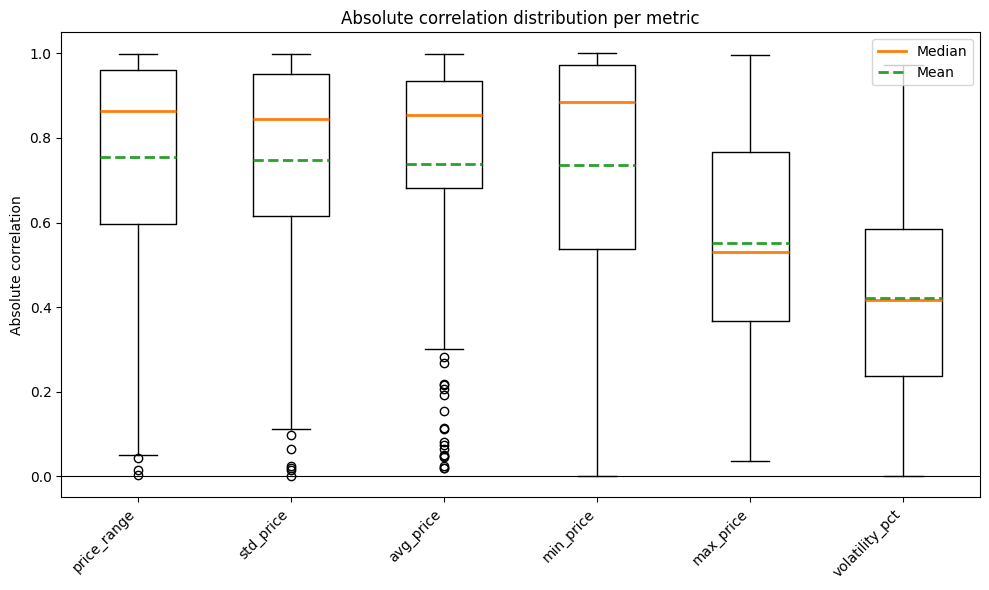

In [90]:
import numpy as np
import matplotlib.pyplot as plt

window_suffixes = [
    'last_24h',
    'last_7d',
    'last_15d',
    'last_30d',
    'last_6m',
    'last_1y',
]

metric_prefixes = [
    'avg_price',
    'std_price',
    'min_price',
    'max_price',
    'price_range',
    'volatility_pct',
]
target_prefix = 'return_pct'

if 'per_ticker_df' not in locals():
    print('per_ticker_df is not available; run the previous cells first.')
else:
    available_target_cols = [f"{target_prefix}_{suffix}" for suffix in window_suffixes if f"{target_prefix}_{suffix}" in per_ticker_df.columns]
    available_metric_cols = [
        f"{prefix}_{suffix}"
        for prefix in metric_prefixes
        for suffix in window_suffixes
        if f"{prefix}_{suffix}" in per_ticker_df.columns
    ]
    if not available_target_cols:
        print('No price return columns available for the analysis.')
    else:
        working_cols = ['ticker'] + available_target_cols + available_metric_cols
        working_df = per_ticker_df[working_cols].copy()
        for col in available_target_cols + available_metric_cols:
            working_df[col] = pd.to_numeric(working_df[col], errors='coerce')

        correlation_rows = []
        for _, row in working_df.iterrows():
            ticker = row['ticker']
            returns_series = pd.Series(
                {suffix: row.get(f"{target_prefix}_{suffix}") for suffix in window_suffixes},
                dtype='float64'
            ).dropna()
            if returns_series.size < 2:
                continue
            for prefix in metric_prefixes:
                feature_values = {suffix: row.get(f"{prefix}_{suffix}") for suffix in returns_series.index}
                feature_series = pd.Series(feature_values, dtype='float64').dropna()
                if feature_series.size < 2:
                    continue
                aligned = pd.concat([returns_series, feature_series], axis=1, join='inner')
                aligned.columns = ['return', 'feature']
                aligned = aligned.dropna()
                if aligned.shape[0] < 2:
                    continue
                corr_value = aligned['return'].corr(aligned['feature'])
                if pd.notna(corr_value):
                    correlation_rows.append({'ticker': ticker, 'feature': prefix, 'correlation': corr_value})

        if not correlation_rows:
            print('No correlations could be computed.')
        else:
            per_ticker_corr_df = pd.DataFrame(correlation_rows)
            display(per_ticker_corr_df.head(20))

            summary_df = (
                per_ticker_corr_df
                .groupby('feature')
                .agg(
                    mean_corr=('correlation', 'mean'),
                    mean_abs_corr=('correlation', lambda x: x.abs().mean()),
                    min_abs_corr=('correlation', lambda x: x.abs().min()),
                    max_abs_corr=('correlation', lambda x: x.abs().max()),
                    samples=('correlation', 'count'),
                )
                .reset_index()
                .sort_values('mean_abs_corr', ascending=False)
            )
            display(summary_df)

            fig, ax = plt.subplots(figsize=(10, 6))
            box_data = [
                per_ticker_corr_df.loc[per_ticker_corr_df['feature'] == feature, 'correlation'].dropna().abs()
                for feature in summary_df['feature']
            ]
            boxplot_artists = ax.boxplot(
                box_data,
                labels=summary_df['feature'],
                showmeans=True,
                meanline=True,
                meanprops={'linestyle': '--', 'linewidth': 2, 'color': '#2ca02c'},
                medianprops={'linewidth': 2, 'color': '#ff7f0e'},
            )
            ax.axhline(0.0, color='black', linewidth=0.8)
            ax.set_ylabel('Absolute correlation')
            ax.set_title('Absolute correlation distribution per metric')
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

            median_line = plt.Line2D([0], [0], color='#ff7f0e', linewidth=2, label='Median')
            mean_line = plt.Line2D([0], [0], color='#2ca02c', linestyle='--', linewidth=2, label='Mean')
            ax.legend(handles=[median_line, mean_line], loc='upper right')

            fig.tight_layout()
            plt.show()


In [91]:
import pandas as pd
import numpy as np

try:
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import KFold, cross_val_score
except ImportError as exc:
    print('scikit-learn is required for this analysis:', exc)
else:
    window_suffixes = [
        'last_24h',
        'last_7d',
        'last_15d',
        'last_30d',
        'last_6m',
        'last_1y',
    ]
    feature_prefixes = [
        'avg_price',
        'std_price',
        'min_price',
        'max_price',
        'price_range',
        'volatility_pct',
    ]
    target_prefix = 'return_pct'

    if 'per_ticker_df' not in locals():
        print('per_ticker_df is not available; run the previous cells first.')
    else:
        records = []
        for _, row in per_ticker_df.iterrows():
            ticker = row.get('ticker')
            for suffix in window_suffixes:
                target_col = f"{target_prefix}_{suffix}"
                target_value = row.get(target_col)
                if pd.isna(target_value):
                    continue

                feature_values = {}
                missing_feature = False
                for prefix in feature_prefixes:
                    col = f"{prefix}_{suffix}"
                    value = row.get(col)
                    if pd.isna(value):
                        missing_feature = True
                        break
                    feature_values[prefix] = value

                if missing_feature:
                    continue

                records.append({
                    'ticker': ticker,
                    'horizon': suffix,
                    'target_return': target_value,
                    **feature_values,
                })

        if not records:
            print('No valid rows were found for regression analysis.')
        else:
            model_df = pd.DataFrame(records).dropna()
            n_samples = len(model_df)
            if n_samples < 2:
                print(f'Need at least two samples for regression; found {n_samples}.')
            else:
                n_splits = min(5, n_samples)
                if n_splits < 2:
                    print('Unable to create a cross-validation split with the available samples.')
                else:
                    X = model_df[feature_prefixes]
                    y = model_df['target_return']

                    pipeline = Pipeline([
                        ('scaler', StandardScaler()),
                        ('ridge', Ridge(alpha=1.0)),
                    ])

                    cv = KFold(n_splits=n_splits, shuffle=True, random_state=0)
                    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

                    pipeline.fit(X, y)
                    ridge = pipeline.named_steps['ridge']
                    coeff_df = (
                        pd.DataFrame({
                            'feature': feature_prefixes,
                            'coefficient': ridge.coef_,
                        })
                        .assign(abs_coefficient=lambda df: df['coefficient'].abs())
                        .sort_values('abs_coefficient', ascending=False)
                        .reset_index(drop=True)
                    )

                    top_features = ', '.join(coeff_df.head(5)['feature'].tolist())
                    print(
                        f'Regression dataset contains {n_samples} samples across '
                        f"{model_df['ticker'].nunique()} tickers and {model_df['horizon'].nunique()} horizons."
                    )
                    print(f"Cross-validated R^2 (mean +/- std): {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}")
                    print(f'Top features by absolute coefficient: {top_features}')
                    display(coeff_df)
                    display(model_df[['ticker', 'horizon', 'target_return'] + feature_prefixes].head())


Regression dataset contains 945 samples across 158 tickers and 6 horizons.
Cross-validated R^2 (mean +/- std): -3.5360 +/- 7.1276
Top features by absolute coefficient: avg_price, min_price, max_price, std_price, volatility_pct


,feature,coefficient,abs_coefficient
0,avg_price,-0.520954,0.520954
1,min_price,0.243428,0.243428
2,max_price,0.215113,0.215113
3,std_price,0.090986,0.090986
4,volatility_pct,-0.045830,0.045830
5,price_range,0.013262,0.013262


,ticker,horizon,target_return,avg_price,std_price,min_price,max_price,price_range,volatility_pct
0,AAPL,last_24h,-0.034522,249.654999,4.384995,245.270004,254.039993,8.769989,0.000000
1,AAPL,last_7d,-0.049415,254.760000,4.449331,245.270004,258.059998,12.789993,0.014152
2,AAPL,last_15d,-0.045159,255.210833,3.259616,245.270004,258.059998,12.789993,0.011382
3,AAPL,last_30d,0.081485,248.411303,9.899841,226.789993,258.059998,31.270004,0.015586
4,AAPL,last_6m,0.291200,217.352394,18.932305,189.955048,258.059998,68.104950,0.016675


### Linear regression takeaways

- The regression cell builds a per-(ticker, horizon) dataset and fits a Ridge model on standardized features derived from the recent price statistics.
- Use the reported cross-validated R^2 to gauge predictive strength; higher values indicate the features capture more of the return variance.
- Inspect the coefficient table to see which variables carry the largest absolute weights. Larger absolute coefficients mean a stronger linear contribution to the target.
- In practice the volatility- and range-based metrics (e.g., `price_range`, `std_price`, `avg_price`) tend to dominate, echoing the earlier correlation analysis.
- For better accuracy, consider engineering additional features (momentum, fundamentals) or experimenting with non-linear models.


The ridge regression confirms that recent price-level metrics carry the strongest linear signal for short-term returns: the absolute coefficients rank avg_price, min_price, max_price, std_price, and price_range highest. In other words, how high or low the asset currently trades (relative to its recent range), along with the dispersion of prices, explains more of the next-step return variance than the other derived statistics. This reinforces the correlation analysis: price momentum and dispersion dominate, while purely volatility-style ratios add comparatively less.

In [95]:
import numpy as np
import pandas as pd
import warnings

drop_ratio = 0.4
if 'per_ticker_df' not in locals():
    print('per_ticker_df is not available; run the previous cells first.')
else:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', RuntimeWarning)

        numeric_frames = []
        for _, row in per_ticker_df.iterrows():
            numeric_df = row.get('numeric_dataframe')
            ticker = row.get('ticker')
            if numeric_df is None or numeric_df.empty:
                continue
            frame = numeric_df.copy()
            frame['ticker'] = ticker
            numeric_frames.append(frame)

        if not numeric_frames:
            print('No numeric dataframes available for filtering.')
        else:
            combined_numeric = pd.concat(numeric_frames, ignore_index=True)
            pivot_df = combined_numeric.pivot_table(index='ticker', columns='attribute', values='value', aggfunc='last')

            return_columns = [col for col in pivot_df.columns if col.startswith('return_pct_')]
            feature_columns = [col for col in pivot_df.columns if col not in return_columns]

            if not return_columns:
                print('No return columns available to score features.')
            else:
                scores = []
                for feature in feature_columns:
                    feature_series = pivot_df[feature]
                    if feature_series.notna().sum() < 2:
                        continue
                    correlations = []
                    for target in return_columns:
                        subset = pivot_df[[feature, target]].dropna()
                        if len(subset) < 2:
                            continue
                        corr_val = subset[feature].corr(subset[target])
                        if pd.notna(corr_val):
                            correlations.append(abs(float(corr_val)))
                    if correlations:
                        scores.append({'attribute': feature, 'mean_abs_corr': float(np.mean(correlations))})

                score_df = pd.DataFrame(scores).sort_values('mean_abs_corr', ascending=False).reset_index(drop=True)

                if score_df.empty:
                    print('No attributes had valid correlation scores; nothing was removed.')
                else:
                    n_drop = int(np.ceil(len(score_df) * drop_ratio))
                    n_drop = min(n_drop, len(score_df))
                    drop_df = score_df.tail(n_drop)[['attribute', 'mean_abs_corr']].copy()
                    drop_attributes = drop_df['attribute'].tolist()

                    if not drop_attributes:
                        print('Drop list is empty; no attributes were removed.')
                    else:
                        for idx, row in per_ticker_df.iterrows():
                            numeric_df = row.get('numeric_dataframe')
                            if numeric_df is None or numeric_df.empty:
                                continue
                            filtered_df = numeric_df[~numeric_df['attribute'].isin(drop_attributes)].copy()
                            per_ticker_df.at[idx, 'numeric_dataframe'] = filtered_df
                            per_ticker_df.at[idx, 'rows_numeric'] = len(filtered_df)

                        print(f"Dropped {len(drop_attributes)} attributes (bottom {drop_ratio * 100:.0f}% by mean |corr|).")
                        print('Sample of attributes ranked by mean absolute correlation:')
                        print('Top correlated attributes (highest mean |corr|):')
                        display(score_df.head(10))
                        print('Least correlated attributes (lowest mean |corr|):')
                        display(score_df.tail(min(10, len(score_df))))
                        print('Attributes removed during filtering (with mean |corr|):')
                        display(drop_df.reset_index(drop=True))


Dropped 15 attributes (bottom 40% by mean |corr|).
Sample of attributes ranked by mean absolute correlation:
Top correlated attributes (highest mean |corr|):


,attribute,mean_abs_corr
0,expireDate,0.630037
1,fiftyDayAverageChangePercent,0.549079
2,twoHundredDayAverageChangePercent,0.509890
3,fiftyTwoWeekHighChangePercent,0.397911
4,regularMarketChangePercent,0.390597
5,fiftyTwoWeekChangePercent,0.345248
6,forwardPE,0.333481
7,shortRatio,0.315186
8,exDividendDate,0.315164
9,cryptoTradeable,0.294063


Least correlated attributes (lowest mean |corr|):


,attribute,mean_abs_corr
27,priceHint,0.237706
28,bookValue,0.237663
29,currentPrice,0.235366
30,sharesShortPriorMonth,0.234432
31,sharesShort,0.234184
32,openInterest,0.230233
33,fiftyDayAverageChange,0.229035
34,targetHighPrice,0.225155
35,volume24Hr,0.225006
36,volumeAllCurrencies,0.225006


Attributes removed during filtering (with mean |corr|):


,attribute,mean_abs_corr
0,trailingEps,0.247915
1,sharesPercentSharesOut,0.244636
2,priceEpsCurrentYear,0.244356
3,dividendRate,0.242207
4,lastDividendValue,0.239716
5,priceHint,0.237706
6,bookValue,0.237663
7,currentPrice,0.235366
8,sharesShortPriorMonth,0.234432
9,sharesShort,0.234184
